# Exploring the Welfake dataset

In this notebook the Welfake dataset (https://zenodo.org/record/4561253) is explored, looking at the distribution of the data and the correlation between the features.

First relevant libraries are imported.

In [52]:
%load_ext autoreload

import pandas as pd
import numpy as np
import os
from dataset_cleaning import clean_welfake_dataset, remove_outliers
import matplotlib.pyplot as plt
from wordcloud import WordCloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading and cleaning of the data

The data is loaded from the csv file if it is already cleaned. Otherwise, rows with missing data and duplicate rows will be removed. In addition, unnecessary whitespace is removed from the text and headlines to make the csv file more readable.

In [53]:
if not os.path.exists('data/WELFake/cleaned_dataset.csv'):
    df = clean_welfake_dataset(save_to_csv=True)
else:
    df = pd.read_csv('data/WELFake/cleaned_dataset.csv', index_col=0)

display(df.head())

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,FAKE
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last n...",FAKE
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,REAL
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",FAKE
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,FAKE


## Remove outliers

Rows with too long or too short news texts are removed, as well as articles where the average word length is too long or too short.

In [54]:
%autoreload
if not os.path.exists('data/WELFake/cleaned_no_outliers.csv'):
    df = remove_outliers(df, save_to_csv=True)
else:
    df = pd.read_csv('data/WELFake/cleaned_no_outliers.csv', index_col=0)
display(df.head())

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,FAKE
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,REAL
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",FAKE
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,FAKE
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",FAKE


## Exploring the data

The data is explored by looking at the total number of fake and real news, the length of the news articles, the average word length and word clouds of the most common words in the fake and real news.

### Total number of fake and real news

,count,percentage
Real,31328,0.560811
Fake,24534,0.439189


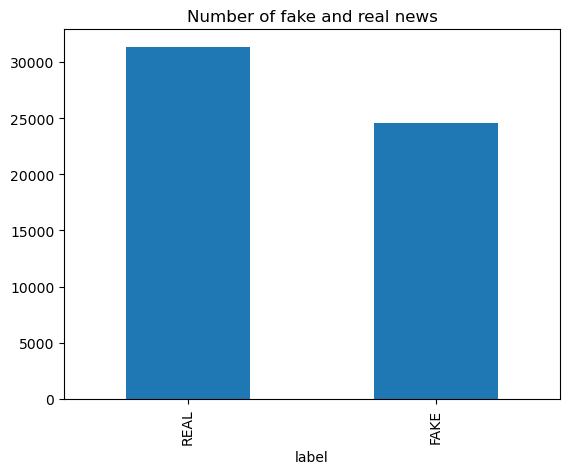

In [55]:
# Total number of real and fake news

total_count_df = pd.DataFrame(
    {
        "count": [df["label"].value_counts()[0], df["label"].value_counts()[1]],
        "percentage": [df["label"].value_counts()[0] / df.shape[0], df["label"].value_counts()[1] / df.shape[0]]
    }, index=["Real", "Fake"]
)

display(total_count_df)

df["label"].value_counts().plot(
    kind="bar", title="Number of fake and real news"
)
plt.show()

### Length of the news articles

,all,fake,real
count,55862.000000,24534.000000,31328.000000
mean,3130.700888,2817.004973,3376.366605
std,2013.656685,1732.718575,2177.558840
min,500.000000,500.000000,500.000000
25%,1740.000000,1728.000000,1757.000000
50%,2563.000000,2364.000000,2744.000000
75%,4100.000000,3378.000000,4740.000000
max,9999.000000,9999.000000,9999.000000


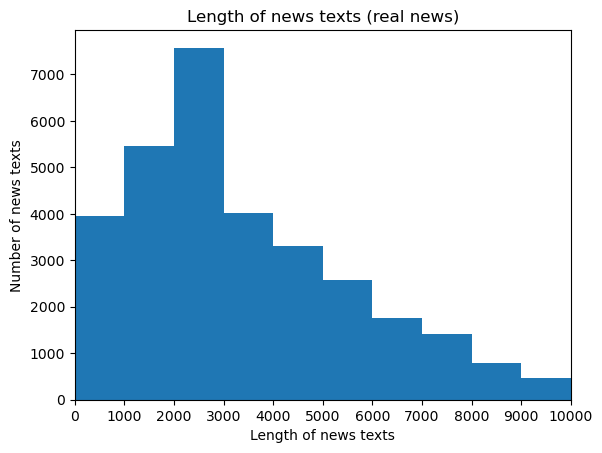

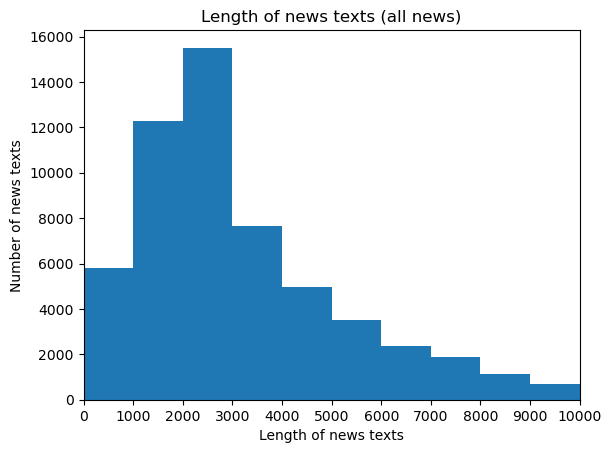

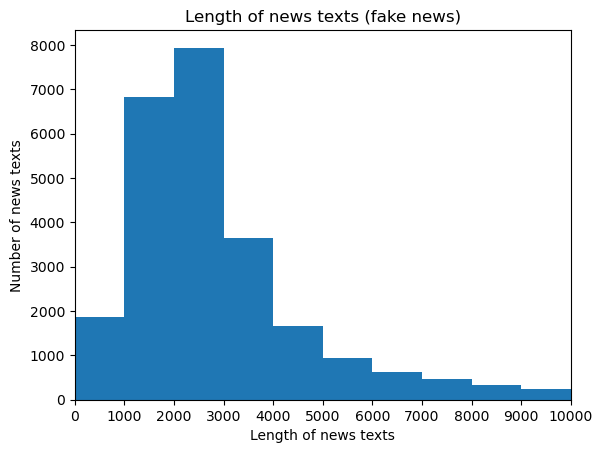

In [56]:
text_length_bins = [i for i in range(0, 11000, 1000)]
text_length_xticks = [i for i in range(0, 11000, 1000)]
text_length_xlim = (0, 10000)
y_label = "Number of news texts"
text_length_x_label = "Length of news texts"

# All news
df["text_len"] = df["text"].apply(lambda x: len(x))
text_length_df = pd.DataFrame(
    {
        "all": df["text_len"].describe(), 
        "fake": df[df["label"] == "FAKE"]["text_len"].describe(),
        "real": df[df["label"] == "REAL"]["text_len"].describe()
    }
)
display(text_length_df)

# Real news
df[df["label"] == "REAL"]["text_len"].plot(
    kind="hist",
    title="Length of news texts (real news)",
    bins=text_length_bins,
    xlim=text_length_xlim,
    xlabel=text_length_x_label,
    ylabel=y_label,
    xticks=text_length_xticks,
)
plt.show()

df["text_len"].plot(
    kind="hist",
    title="Length of news texts (all news)",
    bins=text_length_bins,
    xlim=text_length_xlim,
    xlabel=text_length_x_label,
    ylabel=y_label,
    xticks=text_length_xticks,
)
plt.show()

# Fake news
df[df["label"] == "FAKE"]["text_len"].plot(
    kind="hist",
    title="Length of news texts (fake news)",
    bins=text_length_bins,
    xlim=text_length_xlim,
    xlabel=text_length_x_label,
    ylabel=y_label,
    xticks=text_length_xticks,
)
plt.show()

### Average word length

'Average word length of news texts'

,all,fake,real
count,55862.000000,24534.000000,31328.000000
mean,4.963169,4.914226,5.001498
std,0.334733,0.363609,0.304817
min,4.000000,4.003003,4.000000
25%,4.741110,4.676682,4.794977
50%,4.954378,4.888571,5.002857
75%,5.171642,5.117647,5.206835
max,8.733333,8.733333,6.820896


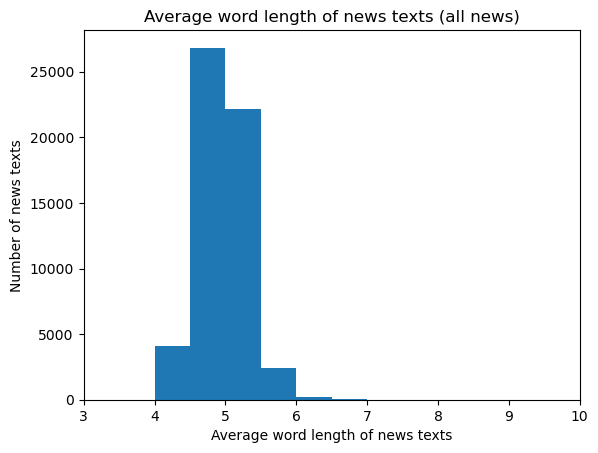

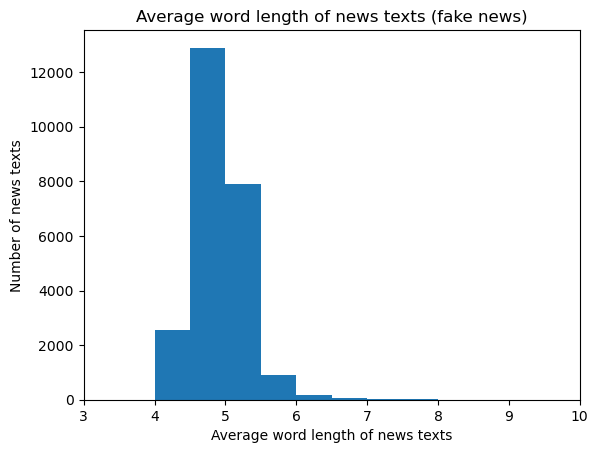

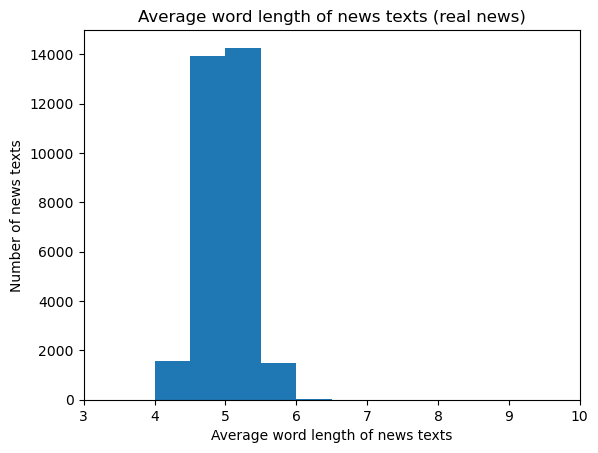

In [57]:
average_word_length_bins = [i * 0.5 for i in range(6, 22)]
average_word_length_xticks = [i for i in range(3, 11)]
average_word_length_xlim = (3, 10)
average_word_length_x_label = "Average word length of news texts"

# All news
df["text_word_len"] = df["text"].apply(
    lambda x: np.average([len(word) for word in x.split(" ")])
)
average_word_length_df = pd.DataFrame(
    {
        "all": df["text_word_len"].describe(),
        "fake": df[df["label"] == "FAKE"]["text_word_len"].describe(),
        "real": df[df["label"] == "REAL"]["text_word_len"].describe()
    }
)
display("Average word length of news texts", average_word_length_df)

df["text_word_len"].plot(
    kind="hist",
    title="Average word length of news texts (all news)",
    bins=average_word_length_bins,
    xlim=average_word_length_xlim,
    xlabel=average_word_length_x_label,
    ylabel=y_label,
    xticks=average_word_length_xticks
)
plt.show()

# Fake news
df[df["label"] == "FAKE"]["text_word_len"].plot(
    kind="hist",
    title="Average word length of news texts (fake news)",
    bins=average_word_length_bins,
    xlim=average_word_length_xlim,
    xlabel=average_word_length_x_label,
    ylabel=y_label,
    xticks=average_word_length_xticks
)
plt.show()

# Real news
df[df["label"] == "REAL"]["text_word_len"].plot(
    kind="hist",
    title="Average word length of news texts (real news)",
    bins=average_word_length_bins,
    xlim=average_word_length_xlim,
    xlabel=average_word_length_x_label,
    ylabel=y_label,
    xticks=average_word_length_xticks
)
plt.show()

## Word clouds

Three word clouds will be created, one for all news, one for fake news and one for real news. The word clouds will show the most common words in the news articles.

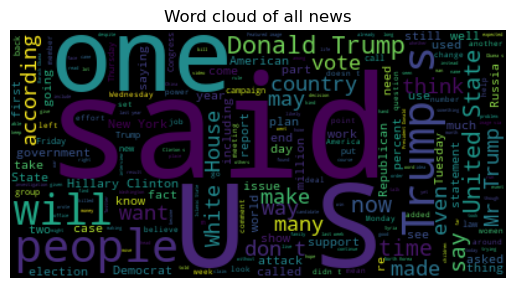

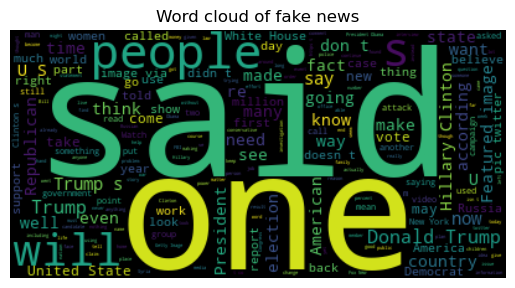

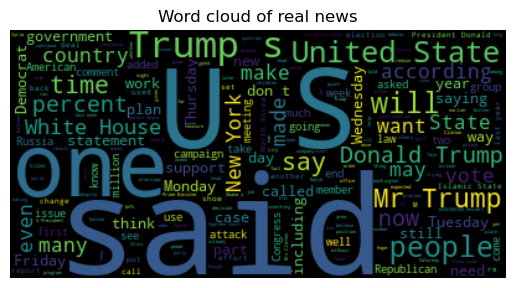

In [58]:
if not os.path.exists("figures"):
    os.mkdir("figures")

def show_word_cloud(df, label):
    exists = os.path.exists(f"figures/{label}_news_word_cloud.png")
    if exists:
        word_cloud = plt.imread(f"figures/{label}_news_word_cloud.png")
    else:
        if label in ("fake", "real"):
            word_cloud = WordCloud().generate(" ".join(df[df["label"] == label.upper()]["text"]))
        else:
            word_cloud = WordCloud().generate(" ".join(df["text"]))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f"Word cloud of {label} news")
    plt.axis("off")
    if not exists:
        plt.imsave(f"figures/{label}_news_word_cloud.png", word_cloud.to_array())
    plt.show()

for label in ("all", "fake", "real"):
    show_word_cloud(df, label)